### Import libraries

In [1]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

from andbro__write_stream_to_sds import __write_stream_to_sds
from andbro__querrySeismoData import __querrySeismoData
# from andbro__get_timeaxis import __get_timeaxis


In [2]:
def __get_stream(seed, tbeg, tend, repository="online"):

    st = obs.Stream()

    invs = []

    print(f" -> loading {seed}...")
    try:
        st0, inv0 = __querrySeismoData(
                                    seed_id=seed,
                                    starttime=tbeg-10,
                                    endtime=tend+10,
                                    repository=repository,
                                    path=None,
                                    restitute=False,
                                    detail=None,
                                    fill_value=None,
                                    )

        st0 = st0.remove_response(inv0, output="VEL", water_level=60)

        st0 = st0.rotate('->ZNE', inventory=inv0)

        st0 = st0.trim(tbeg, tend)

        if len(st0) != 0:
            st += st0

    except Exception as e:
        print(e)
        print(f" -> failed to load data: {seed}")

    return st, invs

### Configurations

In [3]:
config = {}

config['tbeg'] = obs.UTCDateTime("2024-03-11 12:00")
config['tend'] = obs.UTCDateTime("2024-03-11 18:00")

# config['sta'] = ['GELB','GRMB','BIB','TON', 'ALFT', 'FFB1', 'FFB2', 'FFB3', 'FUR']
# config['net'] = ['BW','BW','BW','BW','BW','BW','BW','BW','GR']
# config['loc'] = ''
# config['cha'] = 'BHZ'

config['seeds'] = [
                   # 'BW.GELB..HH*',
                   # 'BW.GRMB..HH*',
                   # 'BW.ALFT..HH*',
                   # 'BW.BIB..HH*',
                   # 'BW.TON..HH*',
                   'BW.FFB1..HH*',
                   'BW.FFB2..HH*',
                   'BW.FFB3..HH*',
                   'GR.FUR..HH*',
]

# config['repository'] = "jane"

config['path_to_out_data'] = "/home/andbro/Downloads/mseed/array/"


In [4]:
st00 = obs.Stream()

for seed in config['seeds']:

    try:
        st0, inv0 = __get_stream(seed, config['tbeg'], config['tend'])

        st00 += st0

    except:
        print(f"-> Error: {seed}")


 -> loading BW.FFB1..HH*...
 -> loading BW.FFB2..HH*...
 -> loading BW.FFB3..HH*...
 -> loading GR.FUR..HH*...


In [5]:
# st.plot(equal_scale=False);

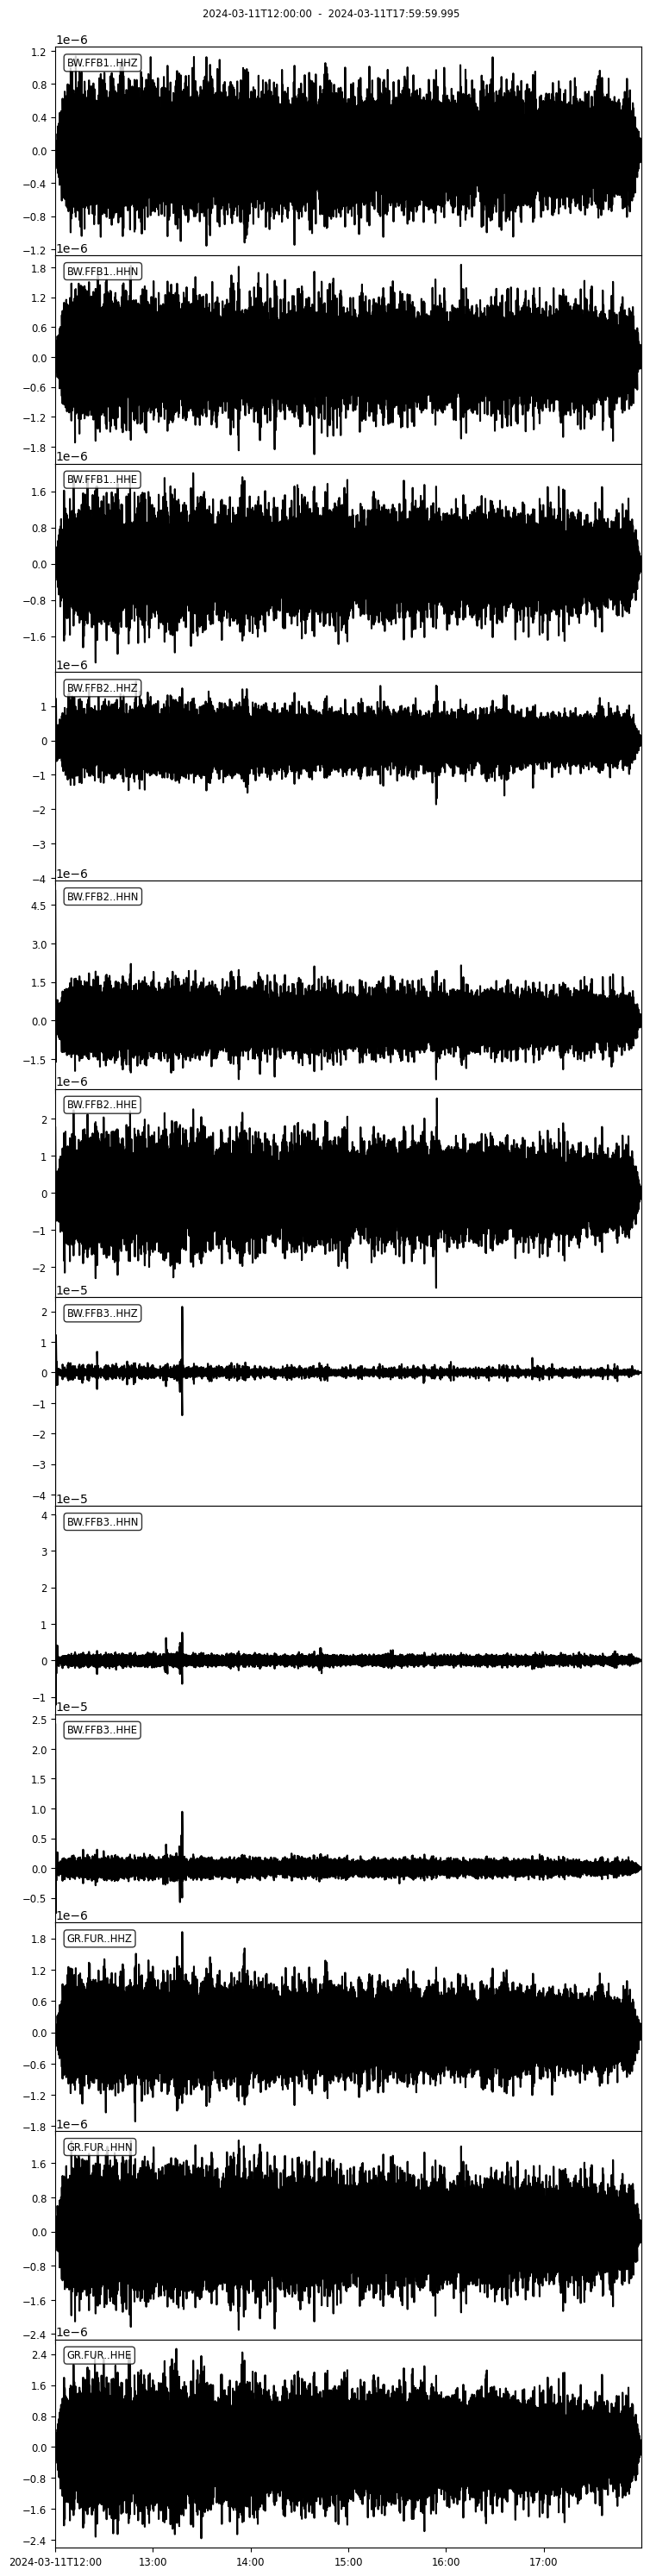

In [9]:
st = st00.copy()

st = st.detrend("simple")

st = st.resample(100, no_filter=False)

st = st.detrend("simple")

st = st.filter("highpass", freq=0.01, corners=4, zerophase=True)

st = st.trim(config['tbeg'], config['tend'], nearest_sample=False)

st.plot(equal_scale=False);

In [12]:
print(st.__str__(extended=True))

12 Trace(s) in Stream:
BW.FFB1..HHZ | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB1..HHN | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB1..HHE | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB2..HHZ | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB2..HHN | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB2..HHE | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB3..HHZ | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB3..HHN | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
BW.FFB3..HHE | 2024-03-11T12:00:00.000000Z - 2024-03-11T17:59:59.990000Z | 100.0 Hz, 2160000 samples
GR.FUR..HHE  | 2024-03-11T12:00:00.005000Z - 2024-03-11T17:59:59.995

## Write Data to Files

In [13]:
__write_stream_to_sds(st, config['path_to_out_data'])

 -> stored stream as: 2024/BW/FFB1/HHZ.D/BW.FFB1..HHZ.D.2024.071
 -> stored stream as: 2024/BW/FFB1/HHN.D/BW.FFB1..HHN.D.2024.071
 -> stored stream as: 2024/BW/FFB1/HHE.D/BW.FFB1..HHE.D.2024.071
 -> stored stream as: 2024/BW/FFB2/HHZ.D/BW.FFB2..HHZ.D.2024.071
 -> stored stream as: 2024/BW/FFB2/HHN.D/BW.FFB2..HHN.D.2024.071
 -> stored stream as: 2024/BW/FFB2/HHE.D/BW.FFB2..HHE.D.2024.071
 -> stored stream as: 2024/BW/FFB3/HHZ.D/BW.FFB3..HHZ.D.2024.071
 -> stored stream as: 2024/BW/FFB3/HHN.D/BW.FFB3..HHN.D.2024.071
 -> stored stream as: 2024/BW/FFB3/HHE.D/BW.FFB3..HHE.D.2024.071
 -> stored stream as: 2024/GR/FUR/HHE.D/GR.FUR..HHE.D.2024.071
 -> stored stream as: 2024/GR/FUR/HHN.D/GR.FUR..HHN.D.2024.071
 -> stored stream as: 2024/GR/FUR/HHZ.D/GR.FUR..HHZ.D.2024.071
